# LightGBM Classifier -  Breast Cancer Classification

<img src="images/breast_cancer.jpg"/>

Worldwide, breast cancer is the most common type of cancer in women and the second highest in terms of mortality rates.Diagnosis of breast cancer is performed when an abnormal lump is found (from self-examination or x-ray) or a tiny speck of calcium is seen (on an x-ray). After a suspicious lump is found, the doctor will conduct a diagnosis to determine whether it is cancerous and, if so, whether it has spread to other parts of the body.

This breast cancer dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.

### Libraries

In [1]:
import numpy as np                # linear algebra
import pandas as pd               # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization

# ignore warnings
#import warnings
#warnings.filterwarnings("ignore")

### Get the Data

Data source: https://www.kaggle.com/merishnasuwal/breast-cancer-prediction-dataset?select=Breast_cancer_data.csv

In [2]:
# load and preview data

df = pd.read_csv('data/Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


Check the distribution of target (diagnosis):

In [4]:
# check the distribution of the target variable
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

The target variable is diagnosis. It contains 2 values - 0 and 1. 0 is for Negative prediction and 1 for Positive prediction. We can see that the problem is binary classification task.

In [5]:
# Declare feature vector and target variable

X = df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]

y = df['diagnosis']

In [6]:
# split the dataset into the training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### LightGBM Model Development and Training

* We need to convert our training data into LightGBM dataset format(this is mandatory for LightGBM training). 

* After creating the necessary dataset, we created a python dictionary with parameters and their values.

* Accuracy of the model depends on the values we provide to the parameters.

* In the end block of code, we simply trained model with 100 iterations.

In [7]:
# Build the lightgbm model

import lightgbm as lgb

clf = lgb.LGBMClassifier()

clf.fit(X_train, y_train)

LGBMClassifier()

In [8]:
# Make Predictions

y_pred = clf.predict(X_test)

In [9]:
# View Accuracy

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred, y_test)

print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy))

LightGBM Model accuracy score: 0.9298


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

### Compare train and test set accuracy
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [10]:
y_pred_train = clf.predict(X_train)

In [11]:
accuracy_train = accuracy_score(y_train, y_pred_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_train))

Training-set accuracy score: 1.0000


### Check for Overfitting

In [12]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9298


The training and test set accuracy are quite comparable. So, we cannot say there is overfitting.

### Confusion Matrix

In [13]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 55   8]
 [  4 104]]

True Positives(TP) =  55

True Negatives(TN) =  104

False Positives(FP) =  8

False Negatives(FN) =  4


<AxesSubplot:>

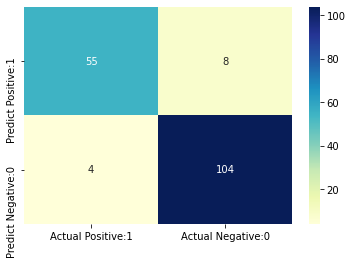

In [14]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Classification Matrices

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        63
           1       0.93      0.96      0.95       108

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



### LightGBM Parameter Tuning 

In this section, I will discuss some tips to improve LightGBM model efficiency.

Following set of practices can be used to improve your model efficiency.

1. **num_leaves** : This is the main parameter to control the complexity of the tree model. Ideally, the value of num_leaves should be less than or equal to 2^(max_depth). Value more than this will result in overfitting.

2. **min_data_in_leaf** : Setting it to a large value can avoid growing too deep a tree, but may cause under-fitting. In practice, setting it to hundreds or thousands is enough for a large dataset.

3. **max_depth** : We also can use max_depth to limit the tree depth explicitly.

For Faster Speed
* Use bagging by setting bagging_fraction and bagging_freq.
* Use feature sub-sampling by setting feature_fraction.
* Use small max_bin.
* Use save_binary to speed up data loading in future learning.

For better accuracy
* Use large max_bin (may be slower).
* Use small learning_rate with large num_iterations
* Use large num_leaves(may cause over-fitting)
* Use bigger training data
* Try dart
* Try to use categorical feature directly.

To deal with over-fitting
* Use small max_bin
* Use small num_leaves
* Use min_data_in_leaf and min_sum_hessian_in_leaf
* Use bagging by set bagging_fraction and bagging_freq
* Use feature sub-sampling by set feature_fraction
* Use bigger training data
* Try lambda_l1, lambda_l2 and min_gain_to_split to regularization
* Try max_depth to avoid growing deep tree